<a href="https://colab.research.google.com/github/Etinuz/Courses-DL1/blob/master/Lesson_5_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5 -  Linear Regression from scratch (PyTorch basics)

<!-- <iframe width="560" height="315" src="https://www.youtube.com/embed/ECHX1s0Kk-o?controls=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> -->

This tutorial is a copy of https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch

## Machine Learning

<img src="https://i.imgur.com/oJEQe7k.png" width="500">


## Libraries

In [0]:
# Import Numpy & PyTorch
import numpy as np
import torch

%matplotlib inline
from fastai.basics import *

import fastai
fastai.__version__

'1.0.45'

A tensor is a number, vector, matrix or any n-dimensional array.

## Problem Statement

We'll create a model that predicts crop yeilds for apples and oranges (*target variables*) by looking at the average temperature, rainfall and humidity (*input variables or features*) in a region. Here's the training data:

<img src="https://i.imgur.com/lBguUV9.png" width="500" />

In a **linear regression** model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yeild_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
yeild_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

Visually, it means that the yield of apples is a linear or planar function of the temperature, rainfall & humidity.

<img src="https://i.imgur.com/mtkR2lB.png" width="540" >


**Our objective**: Find a suitable set of *weights* and *biases* using the training data, to make accurate predictions.

## Training Data
The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column per variable.

In [0]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [0]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

Before we build a model, we need to convert inputs and targets to PyTorch tensors.

In [0]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Linear Regression Model (from scratch)

The *weights* and *biases* can also be represented as matrices, initialized with random values. The first row of `w` and the first element of `b` are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

In [0]:
np.random.seed = 42
torch.manual_seed(7)
torch.cuda.manual_seed(123)



The *model* is simply a function that performs a matrix multiplication of the input `x` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

In [0]:
# Define the model
def model(x):
    return x @ w.t() + b

What makes PyTorch special, is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. `w` and `b`.

In [0]:


# Weights and biases
w = torch.randn(2, 3, requires_grad=True) #requires_grad = true  => calculate the derivates of each weight
b = torch.randn(2, requires_grad=True) 
print(w)
print(b)

tensor([[ 0.1382, -1.6822,  0.3177],
        [ 0.1328,  0.1373,  0.2405]], requires_grad=True)
tensor([1.3955, 1.3470], requires_grad=True)


The matrix obtained by passing the input data to the model is a set of predictions for the target variables.

In [0]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -87.5651,   30.5861],
        [-113.7329,   40.9119],
        [-193.5728,   45.2543],
        [ -45.0914,   29.6985],
        [-128.3242,   40.5320]], grad_fn=<AddBackward0>)


In [0]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Because we've started with random weights and biases, the model does not a very good job of predicting the target varaibles.

## Loss Function

We can compare the predictions with the actual targets, using the following method: 
* Calculate the difference between the two matrices (`preds` and `targets`).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the **mean squared error** (MSE).

In [0]:
# MSE loss
def mse(y_hat, y):
    diff = y_hat - y    
    return torch.sum(diff **2) / diff.numel() #number of items in the matrix

In [0]:
# Compute loss
loss = mse(preds, targets)
print(loss)
print(loss**0.5)


tensor(23331.9570, grad_fn=<DivBackward0>)
tensor(152.7480, grad_fn=<PowBackward0>)


The resulting number is called the **loss**, because it indicates how bad the model is at predicting the target variables. Lower the loss, better the model. 

## Compute Gradients

With PyTorch, we can automatically compute the gradient or derivative of the `loss` w.r.t. to the weights and biases, because they have `requires_grad` set to `True`.

In [0]:
# Compute gradients
loss.backward()

The gradients are stored in the `.grad` property of the respective tensors.

In [0]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.1382, -1.6822,  0.3177],
        [ 0.1328,  0.1373,  0.2405]], requires_grad=True)
tensor([[-15639.8936, -18746.4336, -11088.0996],
        [ -4427.6289,  -5506.6582,  -3278.5190]])


In [0]:
# Gradients for bias
print(b)
print(b.grad)

tensor([1.3955, 1.3470], requires_grad=True)
tensor([-189.8573,  -54.6034])


A key insight from calculus is that the gradient indicates the rate of change of the loss, or the slope of the loss function w.r.t. the weights and biases. 

* If a gradient element is **postive**, 
    * **increasing** the element's value slightly will **increase** the loss.
    * **decreasing** the element's value slightly will **decrease** the loss.

<img src="https://i.imgur.com/2H4INoV.png" width="400" />



* If a gradient element is **negative**,
    * **increasing** the element's value slightly will **decrease** the loss.
    * **decreasing** the element's value slightly will **increase** the loss.
    
<img src="https://i.imgur.com/h7E2uAv.png" width="400" />    

The increase or decrease is proportional to the value of the gradient.

Finally, we'll reset the gradients to zero before moving forward, because PyTorch accumulates gradients.

In [0]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## Adjust weights and biases using gradient descent

We'll reduce the loss and improve our model using the gradient descent algorithm, which has the following steps:

1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

In [0]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -87.5651,   30.5861],
        [-113.7329,   40.9119],
        [-193.5728,   45.2543],
        [ -45.0914,   29.6985],
        [-128.3242,   40.5320]], grad_fn=<AddBackward0>)


In [0]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [0]:
# Calculate the loss
loss = mse(preds, targets)
print(loss**0.5)

tensor(152.7480, grad_fn=<PowBackward0>)


In [0]:
# Compute gradients
loss.backward()

In [0]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.1382, -1.6822,  0.3177],
        [ 0.1328,  0.1373,  0.2405]], requires_grad=True)
tensor([[-15639.8936, -18746.4336, -11088.0996],
        [ -4427.6289,  -5506.6582,  -3278.5190]])


In [0]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [0]:
print(w)
print(b)

tensor([[ 0.2946, -1.4947,  0.4286],
        [ 0.1771,  0.1924,  0.2733]], requires_grad=True)
tensor([1.3973, 1.3476], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [0]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss**0.5)

tensor(127.4027, grad_fn=<PowBackward0>)


## Train for multiple epochs

To reduce the loss further, we repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch.

In [0]:
lr = 1e-5

In [0]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

In [0]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss**0.5)

tensor(21.4575, grad_fn=<PowBackward0>)


In [0]:
# Print predictions
preds

tensor([[ 65.7465,  74.2597],
        [ 91.6247, 100.2751],
        [ 83.4825, 127.5099],
        [ 69.9600,  58.3573],
        [ 90.0570, 106.2621]], grad_fn=<AddBackward0>)

In [0]:
# Print targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [0]:
# Print targets
w,b

(tensor([[ 0.3286, -0.0216,  0.9723],
         [ 0.1022,  0.6644,  0.4868]], requires_grad=True),
 tensor([1.4009, 1.3483], requires_grad=True))

## Linear Regression Model using PyTorch built-ins

Let's re-implement the same model using some built-in functions and classes from PyTorch.

In [0]:
# Imports
import torch.nn as nn

In [0]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], 
                   [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], 
                   [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [0]:
#convert to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

### Dataset and DataLoader

We'll create a `TensorDataset`, which allows access to rows from `inputs` and `targets` as tuples. We'll also create a DataLoader, to split the data into batches while training. It also provides other utilities like shuffling and sampling.

In [0]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [0]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [0]:
# Define data loader
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[69., 96., 70.],
         [69., 96., 70.]]), tensor([[103., 119.],
         [103., 119.]])]

### nn.Linear
Instead of initializing the weights & biases manually, we can define the model using `nn.Linear`.

In [0]:
# Define model
model = nn.Linear(3, 2) 
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1957,  0.0226, -0.3294],
        [-0.2521,  0.1939,  0.3323]], requires_grad=True)
Parameter containing:
tensor([ 0.0081, -0.2246], requires_grad=True)


### Optimizer
Instead of manually manipulating the weights & biases using gradients, we can use the optimizer `optim.SGD`.

In [0]:
lr = 1e-5

In [0]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=lr) # momentum=0.9, weight_decay=0.1
opt

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Loss Function
Instead of defining a loss function manually, we can use the built-in loss function `mse_loss`.

In [0]:
# Import nn.functional
import torch.nn.functional as F

In [0]:
# Define loss function get it from Pytorch Functions
loss_fn = F.mse_loss

In [0]:
# Write your own function Root Mean Squared Error
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))
  
  

In [0]:
loss_fn = RMSELoss

In [0]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9959.4326, grad_fn=<MseLossBackward>)


### Train the model

We are ready to train the model now. We can define a utility function `fit` which trains the model for a given number of epochs.

In [0]:
# Define a utility function to train the model
losses = []

def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            losses.append(loss)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
            
    print('Training loss: ', loss_fn(model(inputs), targets))

In [0]:
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(6.0282, grad_fn=<MseLossBackward>)


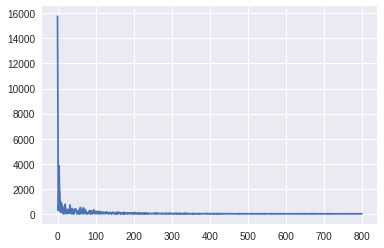

In [0]:
plt.plot(losses);

In [0]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.7049,  70.4776],
        [ 80.4536,  99.7867],
        [123.3064, 135.0589],
        [ 22.8089,  37.8225],
        [ 97.7562, 117.0597],
        [ 57.7049,  70.4776],
        [ 80.4536,  99.7867],
        [123.3064, 135.0589],
        [ 22.8089,  37.8225],
        [ 97.7562, 117.0597],
        [ 57.7049,  70.4776],
        [ 80.4536,  99.7867],
        [123.3064, 135.0589],
        [ 22.8089,  37.8225],
        [ 97.7562, 117.0597]], grad_fn=<AddmmBackward>)

In [0]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [0]:
w,b

(tensor([[-0.3897,  0.7502,  0.8366],
         [-0.2120,  1.5136, -0.4133]], requires_grad=True),
 tensor([-0.3582,  1.2425], requires_grad=True))

#  Neural Network with FastAI

![ffnn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/400px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Conceptually, you think of feedforward neural networks as two or more linear regression models stacked on top of one another with a non-linear activation function applied between them.

<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" width="640">

To use a feedforward neural network instead of linear regression, we can extend the `nn.Module` class from PyTorch.

In [0]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], 
                   [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], 
                   [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

#convert to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [0]:
#Valid 
# Input (temp, rainfall, humidity)
inputs_valid = np.array([[100,55, 66], [80, 45, 60], [90, 88, 50], [66, 55, 44], [60, 100, 40], 
                   [100,55, 66], [80, 45, 60], [90, 88, 50], [66, 55, 44], [60, 100, 40], 
                   [100,55, 66], [80, 45, 60], [90, 88, 50], [66, 55, 44], [60, 100, 40]], dtype='float32')

# Targets (apples, oranges)
targets_valid = np.array([[52, 73], [47, 66], [73, 88], [50, 64], [88, 98], 
                    [52, 73], [47, 66], [73, 88], [50, 64], [88, 98], 
                    [52, 73], [47, 66], [73, 88], [50, 64], [88, 98]], dtype='float32')


#convert to tensors
inputs_valid = torch.from_numpy(inputs_valid)
targets_valid = torch.from_numpy(targets_valid)


In [0]:
#create FastAI Databunch

bs=5
train_ds = TensorDataset(inputs, targets)
valid_ds = TensorDataset(inputs_valid, targets_valid)
data =  DataBunch.create(train_ds, valid_ds, bs=bs)

In [0]:
data.train_ds.tensors

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

In [0]:
class SimpleNeuralNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 3)
        self.act1 = nn.ReLU() # Activation function
        self.linear_out = nn.Linear(3, 2)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)     
        x = self.linear_out(x)
        return x

In [0]:
class SimpleLinear(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()       
        self.linear_out = nn.Linear(3, 2)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear_out(x)
        return x

Now we can define the model, optimizer and loss function exactly as before.

In [0]:
loss_fn = F.mse_loss

In [0]:
learn = Learner(data, SimpleNeuralNet(), opt_func=optim.SGD,  loss_func=loss_fn)

In [0]:
learn.model


SimpleNeuralNet(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (act1): ReLU()
  (linear_out): Linear(in_features=3, out_features=2, bias=True)
)

In [0]:
print(learn.model.linear1.weight)
print(learn.model.linear_out.weight)


Parameter containing:
tensor([[-0.0281, -0.5153,  0.1612],
        [ 0.0813,  0.2996, -0.1171],
        [ 0.5449, -0.5424, -0.1287]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.3157,  0.4761,  0.2539],
        [-0.3209, -0.1167, -0.4969]], device='cuda:0', requires_grad=True)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-05


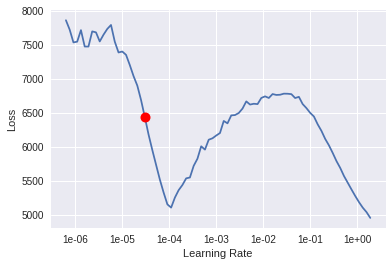

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(20, 2e-5)

epoch,train_loss,valid_loss
1,7740.164062,4811.693848
2,7571.011719,4007.507812
3,6595.344727,642.831360
4,5578.282715,2566.636719
5,4973.152344,3984.820312
6,4861.096191,1284.535522
7,4394.241699,575.412720
8,3885.560303,1028.039307
9,3469.254150,391.557312
10,3104.967285,490.910553


Finally, we can apply gradient descent to train the model using the same `fit` function defined earlier for linear regression.

<img src="https://i.imgur.com/g7Rl0r8.png" width="500">

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07


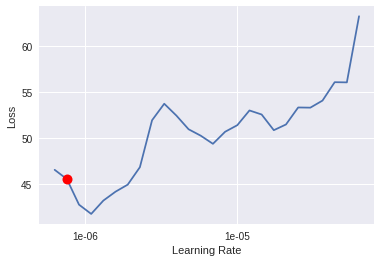

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(20, 2e-6)

epoch,train_loss,valid_loss
1,57.021595,80.252029
2,54.336353,69.316605
3,48.038216,52.021168
4,43.231838,46.847424
5,43.153702,53.369652
6,44.237667,49.522209
7,42.567883,48.252190
8,40.290031,52.856071
9,38.575390,54.409588
10,37.299736,52.420982


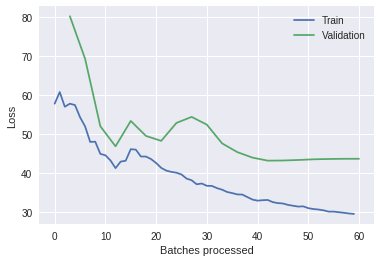

In [0]:
learn.recorder.plot_losses()

In [0]:
13**0.5

3.605551275463989

In [0]:
# Generate predictions 
preds = learn.get_preds(DatasetType.Train) #dataset is shuffled
preds[0]

tensor([[ 28.5929,  33.2269],
        [ 59.1073,  69.3798],
        [ 59.1073,  69.3798],
        [ 81.8384,  96.3113],
        [ 96.6363, 113.8435],
        [ 59.1073,  69.3798],
        [ 81.8384,  96.3113],
        [ 28.5929,  33.2269],
        [ 28.5929,  33.2269],
        [ 81.8384,  96.3113],
        [120.6571, 142.3030],
        [ 96.6363, 113.8435],
        [120.6571, 142.3030],
        [120.6571, 142.3030],
        [ 96.6363, 113.8435]])

In [0]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [0]:

learn.model.linear_out.weight, learn.model.linear_out.bias

(Parameter containing:
 tensor([[-0.4256,  0.9518,  0.5602],
         [-0.2555,  1.0937,  0.3626]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.1488, -0.3550], device='cuda:0', requires_grad=True))